## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.


In [20]:
#dependencies
import random
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config import *
import requests
from pprint import pprint

In [2]:
#generate cities list
#longitude (-180,180), latitude (-90,90)
def city_gen():
    '''
    Returns a list of randomly generated lat, lng coordinates and closest city
    '''
    #import list of cities and coordinates
    from citipy import citipy
    
    lat, lng = random.uniform(-90, 90), random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    city_marker = city.city_name+','+city.country_code
    
    return [lat, lng, city_marker]
city = city_gen()
city

[-46.19386039820692, -65.83842378371091, 'comodoro rivadavia,ar']

In [37]:
#request current weather
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#set up number of cities to query
iterator = 0
number_of_cities = 10

#set up lists for results
lat = []
lng = []
temp = []
cities = []
countries = []

while iterator < number_of_cities:
    #generate random city
    city = city_gen()
    
    r = requests.get(query_url + city[2])
    #print(r.url)
    
    if r.status_code == 200:
        response = r.json()
        #pprint(response)
        try:
            temp.append(response['main']['temp'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            cities.append(response['name'])
            countries.append(response['sys']['country'])
            iterator += 1
        except KeyError:
            print('Key is not found')

In [38]:
cities_dict = {
    'City':cities,
    'Country':countries,
    'Latitude':lat,
    'Longitude':lng,
    'Temperature, '+units:temp
}

In [39]:
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Country,Latitude,Longitude,"Temperature,imperial"
0,Barrow,US,39.51,-90.40,24.31
1,Santa Cruz del Sur,CU,20.71,-78.00,69.79
2,Mar del Plata,AR,-46.43,-67.52,54.76
3,Kodiak,US,39.95,-94.76,14.00
4,Mocuba,MZ,-16.84,36.99,75.01


/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


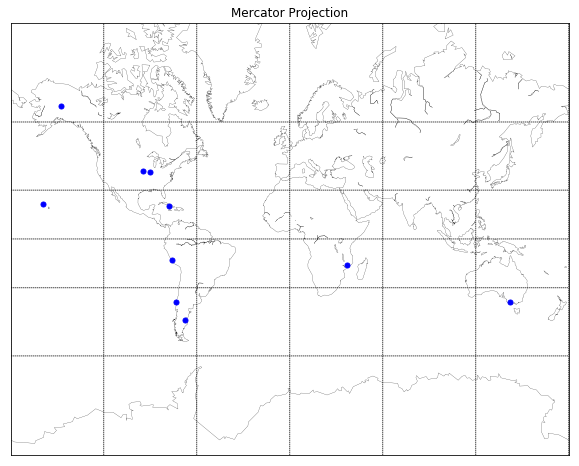

In [40]:
# plot initial coordinates to see how the pick is spread
f, ax = plt.subplots(figsize=(10,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.2)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))

x,y= m(cities_df['Longitude'].tolist(),cities_df['Latitude'].tolist())
m.plot(x,y, 'bo', markersize=5)

plt.title("Mercator Projection")
plt.show()

In [ ]:
cities = {}